In [77]:
# Dependencies
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import seaborn as se

In [78]:
# Read csv file
youtube_df = pd.read_csv("../Cleaned_Data/cleaned_youtube_data.csv", encoding="iso-8859-1")
# Display Data
youtube_df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,country_rank,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_month,Gross tertiary education enrollment (%),Population,Unemployment rate,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,1,6800000,108400000,2006,Mar,28.1,1366417754,5.36,20.593684,78.962880
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,7670,0,0,2006,Mar,88.2,328239523,14.70,37.090240,-95.712891
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,1,4000000,64700000,2012,Feb,88.2,328239523,14.70,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,2,5900000,94800000,2006,Sep,88.2,328239523,14.70,37.090240,-95.712891
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,2,5500000,87500000,2006,Sep,28.1,1366417754,5.36,20.593684,78.962880


In [79]:
youtube_df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'country_rank', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'created_year', 'created_month',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Latitude', 'Longitude'],
      dtype='object')

In [80]:
# Remove non-required columns
raw_youtube_df = youtube_df[["rank","Youtuber","subscribers","video views","category",
                                "Title","uploads","Country","country_rank","lowest_yearly_earnings",
                                 "highest_yearly_earnings","created_year", "created_month",
                                 "Gross tertiary education enrollment (%)","Population", "Unemployment rate","Latitude",
                                 "Longitude"]]

# Display data
raw_youtube_df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,country_rank,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_month,Gross tertiary education enrollment (%),Population,Unemployment rate,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,1,6800000,108400000,2006,Mar,28.1,1366417754,5.36,20.593684,78.962880
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,7670,0,0,2006,Mar,88.2,328239523,14.70,37.090240,-95.712891
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,1,4000000,64700000,2012,Feb,88.2,328239523,14.70,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,2,5900000,94800000,2006,Sep,88.2,328239523,14.70,37.090240,-95.712891
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,2,5500000,87500000,2006,Sep,28.1,1366417754,5.36,20.593684,78.962880


In [81]:
# Selecting channels created from 2005
raw_youtube_df = raw_youtube_df.loc[raw_youtube_df["created_year"]>= 2005,:]

# Display data
raw_youtube_df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,country_rank,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_month,Gross tertiary education enrollment (%),Population,Unemployment rate,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,1,6800000,108400000,2006,Mar,28.1,1366417754,5.36,20.593684,78.962880
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,7670,0,0,2006,Mar,88.2,328239523,14.70,37.090240,-95.712891
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,1,4000000,64700000,2012,Feb,88.2,328239523,14.70,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,2,5900000,94800000,2006,Sep,88.2,328239523,14.70,37.090240,-95.712891
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,2,5500000,87500000,2006,Sep,28.1,1366417754,5.36,20.593684,78.962880


In [82]:
# Drop rows containing 'NaN'
raw_youtube_df = raw_youtube_df.dropna(how='any').reset_index(drop=True)

# Show counts of columns
raw_youtube_df.count()

rank                                       829
Youtuber                                   829
subscribers                                829
video views                                829
category                                   829
Title                                      829
uploads                                    829
Country                                    829
country_rank                               829
lowest_yearly_earnings                     829
highest_yearly_earnings                    829
created_year                               829
created_month                              829
Gross tertiary education enrollment (%)    829
Population                                 829
Unemployment rate                          829
Latitude                                   829
Longitude                                  829
dtype: int64

In [83]:
# View column types
raw_youtube_df.dtypes

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                  int64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
country_rank                                 int64
lowest_yearly_earnings                       int64
highest_yearly_earnings                      int64
created_year                                 int64
created_month                               object
Gross tertiary education enrollment (%)    float64
Population                                   int64
Unemployment rate                          float64
Latitude                                   float64
Longitude                                  float64
dtype: object

In [84]:
# Change column types
clean_youtube_df = raw_youtube_df.astype({"video views":"int64",
                                         "country_rank":"int64",
                                         "lowest_yearly_earnings":"int64",
                                         "highest_yearly_earnings":"int64",
                                         "created_year":"int64",
                                         "Population":"int64"
                                
                                                                                   })

# Check updated data types
clean_youtube_df.dtypes

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                  int64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
country_rank                                 int64
lowest_yearly_earnings                       int64
highest_yearly_earnings                      int64
created_year                                 int64
created_month                               object
Gross tertiary education enrollment (%)    float64
Population                                   int64
Unemployment rate                          float64
Latitude                                   float64
Longitude                                  float64
dtype: object

In [85]:
# Save cleaned data to CSV
clean_youtube_df.to_csv("cleaned_youtube_data.csv", index=False)
clean_youtube_df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,country_rank,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_month,Gross tertiary education enrollment (%),Population,Unemployment rate,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,1,6800000,108400000,2006,Mar,28.1,1366417754,5.36,20.593684,78.962880
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,7670,0,0,2006,Mar,88.2,328239523,14.70,37.090240,-95.712891
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,1,4000000,64700000,2012,Feb,88.2,328239523,14.70,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,2,5900000,94800000,2006,Sep,88.2,328239523,14.70,37.090240,-95.712891
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,2,5500000,87500000,2006,Sep,28.1,1366417754,5.36,20.593684,78.962880


In [86]:
# summarize data in order to show only related columns:
popularity = youtube_df[["Youtuber","subscribers","created_year","video views","Country","Population","uploads", "category"]]
popularity.head()

,Youtuber,subscribers,created_year,video views,Country,Population,uploads,category
0,T-Series,245000000,2006,228000000000,India,1366417754,20082,Music
1,YouTube Movies,170000000,2006,0,United States,328239523,1,Film & Animation
2,MrBeast,166000000,2012,28368841870,United States,328239523,741,Entertainment
3,Cocomelon - Nursery Rhymes,162000000,2006,164000000000,United States,328239523,966,Education
4,SET India,159000000,2006,148000000000,India,1366417754,116536,Shows


In [87]:
#category by viewings 

In [88]:
view = popularity[["category","video views"]]

# Display data
view.head()

,category,video views
0,Music,228000000000
1,Film & Animation,0
2,Entertainment,28368841870
3,Education,164000000000
4,Shows,148000000000


In [89]:
view = view.sort_values(['video views'], ascending =[False])
top_view = view.head()
top_view

,category,video views
0,Music,228000000000
3,Education,164000000000
4,Shows,148000000000
12,Shows,101000000000
5,People & Blogs,93247040539


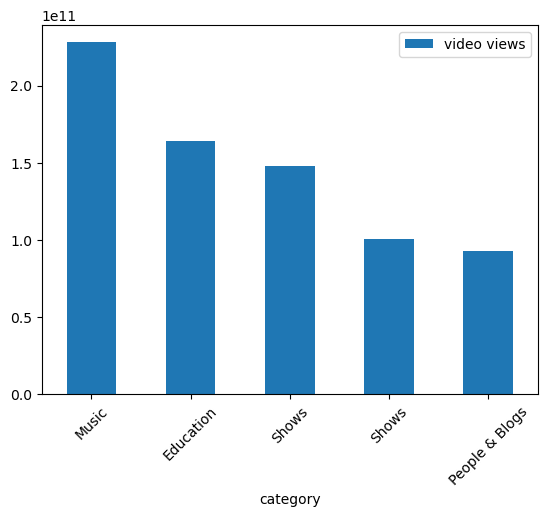

In [90]:
top_view.plot.bar(x= 'category', y='video views', rot= 45)
top_view
plt.savefig("../Cleaned_Data/[category by viewings].png")

In [91]:
#category by subscribers number

In [92]:

cat = popularity[["subscribers","category"]]

# Display data
cat.head()

,subscribers,category
0,245000000,Music
1,170000000,Film & Animation
2,166000000,Entertainment
3,162000000,Education
4,159000000,Shows


In [93]:
cat = cat.sort_values(['subscribers'], ascending =[False])
top_cat = cat.head()
top_cat

,subscribers,category
0,245000000,Music
1,170000000,Film & Animation
2,166000000,Entertainment
3,162000000,Education
4,159000000,Shows


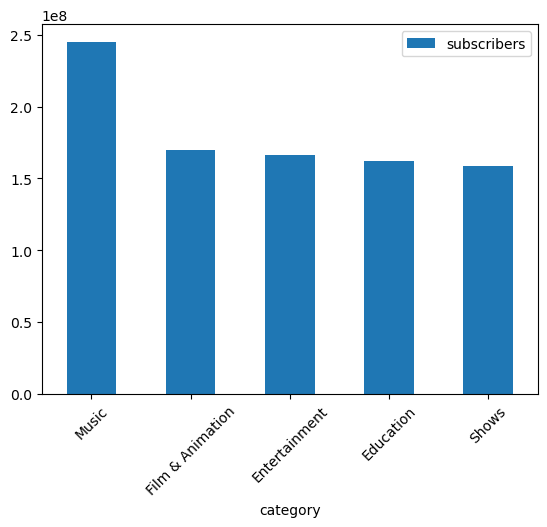

In [94]:
top_cat.plot.bar(x= 'category', y='subscribers', rot= 45)
top_cat
plt.savefig("../Cleaned_Data/[category by subscribers].png")

In [95]:
#calculate uploads / viewings / subscirbers by poplulation in order to get the overall rate 

In [96]:
#create new columns show the rate of subscribers/uploads/viewings over population for the comparision to be fair:

popularity ['Subscribers_Rate'] = popularity['subscribers'] / popularity['Population']
popularity ['Uploads_Rate'] = popularity['uploads'] / popularity['Population']
popularity ['Viewings_Rate'] = popularity['video views'] / popularity['Population']

popularity.head()

C:\Users\jojo\AppData\Local\Temp\ipykernel_5080\2307414794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popularity ['Subscribers_Rate'] = popularity['subscribers'] / popularity['Population']
C:\Users\jojo\AppData\Local\Temp\ipykernel_5080\2307414794.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popularity ['Uploads_Rate'] = popularity['uploads'] / popularity['Population']
C:\Users\jojo\AppData\Local\Temp\ipykernel_5080\2307414794.py:5: SettingWithCopyWarning: 
A value is trying to be set on a c

,Youtuber,subscribers,created_year,video views,Country,Population,uploads,category,Subscribers_Rate,Uploads_Rate,Viewings_Rate
0,T-Series,245000000,2006,228000000000,India,1366417754,20082,Music,0.179301,1.469682e-05,166.859659
1,YouTube Movies,170000000,2006,0,United States,328239523,1,Film & Animation,0.517914,3.046556e-09,0.000000
2,MrBeast,166000000,2012,28368841870,United States,328239523,741,Entertainment,0.505728,2.257498e-06,86.427258
3,Cocomelon - Nursery Rhymes,162000000,2006,164000000000,United States,328239523,966,Education,0.493542,2.942973e-06,499.635140
4,SET India,159000000,2006,148000000000,India,1366417754,116536,Shows,0.116363,8.528578e-05,108.312410


In [97]:
#category by subscribers rate 

In [98]:
sub_rate = popularity[["category","Subscribers_Rate"]]

# Display data
sub_rate.head()

,category,Subscribers_Rate
0,Music,0.179301
1,Film & Animation,0.517914
2,Entertainment,0.505728
3,Education,0.493542
4,Shows,0.116363


In [99]:
Sub_Rate = sub_rate.sort_values(['Subscribers_Rate'], ascending =[False])
s_rate = Sub_Rate.head()
s_rate

,category,Subscribers_Rate
60,Entertainment,145.980315
752,Music,64.689441
317,Comedy,10.560496
131,Gaming,7.249679
45,Gaming,7.143352


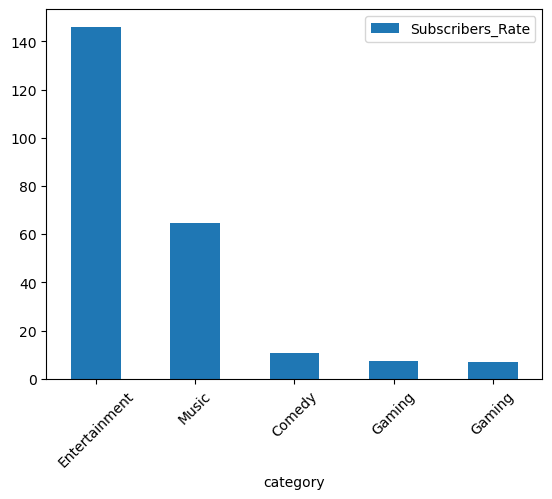

In [100]:
s_rate.plot.bar(x= 'category', y='Subscribers_Rate', rot= 45)
s_rate
plt.savefig("../Cleaned_Data/[category by subscribers Rate].png")

In [101]:

V_Rate = popularity[["category","Viewings_Rate"]]

# Display data
V_Rate.head()

,category,Viewings_Rate
0,Music,166.859659
1,Film & Animation,0.000000
2,Entertainment,86.427258
3,Education,499.635140
4,Shows,108.312410


In [102]:
#category by viewings rate 

In [103]:
V_Rate = V_Rate.sort_values(['Viewings_Rate'], ascending =[False])
view_rate = V_Rate.head()
view_rate

,category,Viewings_Rate
60,Entertainment,78312.850222
752,Music,32778.390423
317,Comedy,10936.597670
483,Entertainment,3598.157417
137,Entertainment,2740.625041


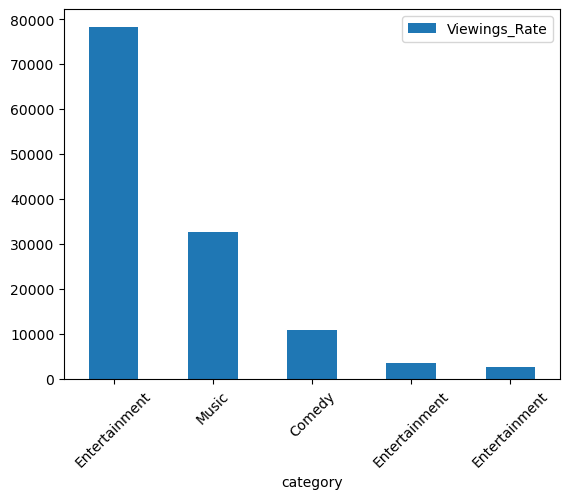

In [104]:
view_rate.plot.bar(x= 'category', y='Viewings_Rate', rot= 45)
view_rate
plt.savefig("../Cleaned_Data/[category by viewings Rate].png")

In [105]:
# category by uploads rate 

In [106]:
uploading_Rate = popularity[["category","Uploads_Rate"]]

# Display data
uploading_Rate.head()

,category,Uploads_Rate
0,Music,1.469682e-05
1,Film & Animation,3.046556e-09
2,Entertainment,2.257498e-06
3,Education,2.942973e-06
4,Shows,8.528578e-05


In [107]:
uploading_Rate = uploading_Rate.sort_values(['Uploads_Rate'], ascending =[False])
upload_rate = uploading_Rate.head()
upload_rate

,category,Uploads_Rate
769,People & Blogs,0.017328
483,Entertainment,0.005591
409,News & Politics,0.004768
482,News & Politics,0.003517
716,News & Politics,0.002740


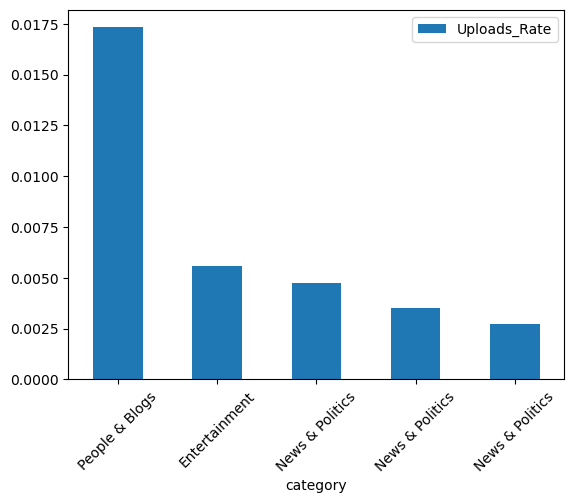

In [108]:
upload_rate.plot.bar(x= 'category', y='Uploads_Rate', rot= 45)
upload_rate
plt.savefig("../Cleaned_Data/[category by uploads Rate].png")

In [109]:
# uploads over years 

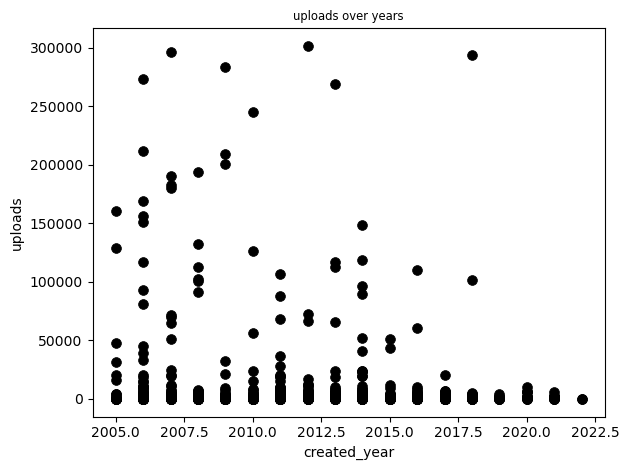

In [110]:
popularity.plot(kind="scatter", x="created_year", y= "uploads",
                  marker="o", color="black", linewidth=0.5, edgecolor="black", s=50)
plt.title("uploads over years", size="small")
plt.tight_layout()
plt.show()

In [111]:
# viewing over years 

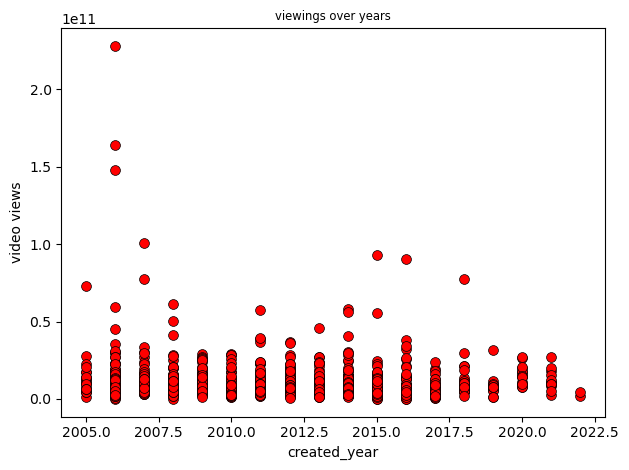

In [112]:
popularity.plot(kind="scatter", x="created_year", y= "video views",
                  marker="o", color="red", linewidth=0.5, edgecolor="black", s=50)
plt.title("viewings over years", size="small")
plt.tight_layout()
plt.show()
#plt.savefig("../output_data/[viewings over years].png")

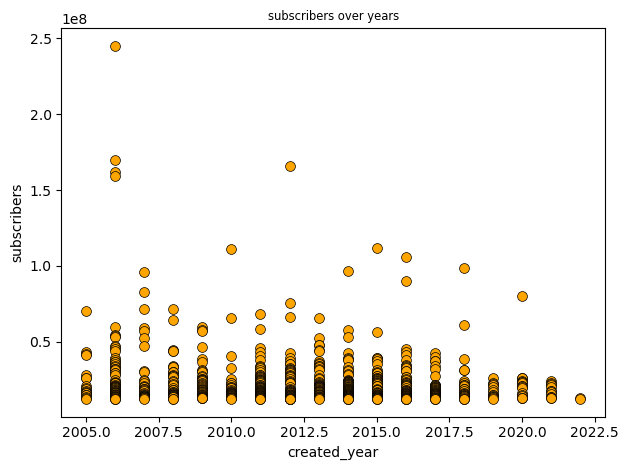

In [113]:
popularity.plot(kind="scatter", x="created_year", y= "subscribers",
                  marker="o", color="orange", linewidth=0.5, edgecolor="black", s=50)
plt.title("subscribers over years", size="small")
plt.tight_layout()
plt.show()


In [70]:
plt.savefig("../Cleaned_Data/[Subscribers over years].png")

<Figure size 640x480 with 0 Axes>